In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
import tensorflow as tf
from keras import metrics, models, layers
from keras.callbacks import EarlyStopping

In [3]:
bankrupt=pd.read_csv('data.csv')

In [4]:
bankrupt.drop(' Net Income Flag',axis=1,inplace=True)


In [37]:
x_train,x_test =train_test_split(bankrupt,train_size=0.8,test_size=0.2,random_state=415)

train_labels=x_train.pop('Bankrupt?')
test_labels=x_test.pop('Bankrupt?')

In [38]:
weights={0:1.,1:100.}

In [39]:
forest=RandomForestClassifier(n_estimators=40,random_state=567,class_weight=weights,max_depth=7,max_features=95)
forest=forest.fit(x_train,train_labels)

In [40]:
feature_names=x_train.columns

feature_importance_forest=pd.DataFrame(forest.feature_importances_,index=feature_names)
feature_importance_forest[0].nlargest(10)

In [42]:
feature_importance_forest[0].nsmallest(10)

 Interest-bearing debt interest rate    0.0
 Revenue Per Share (Yuan ¥)             0.0
 Net Value Growth Rate                  0.0
 Current Ratio                          0.0
 Quick Ratio                            0.0
 Accounts Receivable Turnover           0.0
 Average Collection Days                0.0
 Revenue per person                     0.0
 Allocation rate per person             0.0
 Quick Assets/Current Liability         0.0
Name: 0, dtype: float64

In [43]:
predictions=forest.predict(x_test)

np.bincount(predictions)

print(classification_report(y_true=test_labels,y_pred=predictions,target_names=['no bankrupt','bankrupt']))

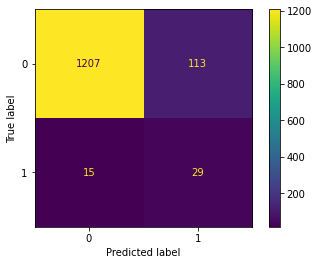

In [46]:
cm=confusion_matrix(test_labels,predictions,labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
disp.plot()

In [15]:
log_reg=LogisticRegression(class_weight={0:1,1:60.},solver='liblinear',random_state=4547)
log_reg=log_reg.fit(x_train,train_labels)

In [16]:
log_prediction=log_reg.predict(x_test)

In [17]:
print(classification_report(y_true=test_labels,y_pred=log_prediction,target_names=['no bankrupt','bankrupt']))

              precision    recall  f1-score   support

 no bankrupt       0.99      0.15      0.27      1320
    bankrupt       0.04      0.93      0.07        44

    accuracy                           0.18      1364
   macro avg       0.51      0.54      0.17      1364
weighted avg       0.95      0.18      0.26      1364



In [18]:
accuracy_score(test_labels,log_prediction)

0.17961876832844575

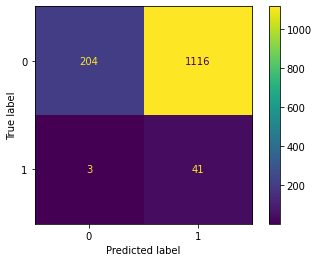

In [19]:
cm_log=confusion_matrix(test_labels,log_prediction,labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=log_reg.classes_)
disp.plot()

In [20]:
df=(bankrupt-bankrupt.mean())/bankrupt.std()
df['Bankrupt?']=bankrupt['Bankrupt?']
bankrupt=df.fillna(0)

In [21]:
bankrupt

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,-2.217747,-2.045648,-2.400185,-0.383306,-0.382610,0.016455,-0.023514,-0.020163,-0.087472,...,-0.034269,-2.254152,-0.049487,-0.084268,-0.383437,-0.861548,0.680121,-0.060026,-0.098971,-0.622022
1,1,-0.673779,-0.311045,-0.598406,0.135058,0.136297,0.014669,0.014798,0.015965,-0.005956,...,-0.034269,-0.309011,-0.049487,-0.021387,0.135243,-0.029802,0.240667,15.128707,0.364532,-0.535534
2,1,-1.303576,-0.908353,-1.319813,-0.383731,-0.388148,0.007857,-0.061107,-0.051179,-0.142227,...,-0.034269,-0.820449,-0.049487,-0.005984,-0.383670,-0.249802,0.679197,-0.062957,-0.125006,-0.621914
3,1,-1.735759,-1.636089,-1.556226,-1.441312,-1.441726,-0.004257,-0.017312,-0.008676,-0.024490,...,-0.034269,-1.691098,-0.049487,-0.080220,-1.441420,-0.392835,0.093758,-0.053899,-0.052558,-0.471791
4,1,-0.661729,-0.307722,-0.508013,-0.541198,-0.540668,0.016757,0.013702,0.016185,-0.013253,...,-0.034269,-0.315985,-0.049487,-0.032050,-0.541215,-0.029562,-0.128005,-0.178024,0.776338,-0.241697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,-0.189381,-0.291938,-0.168169,-0.206262,-0.204954,0.018213,0.017034,0.018195,-0.010092,...,-0.034269,-0.194217,-0.049487,-0.024009,-0.206201,-0.002968,-0.052520,-0.030435,0.063210,-0.353667
6815,0,-0.494640,-0.310214,-0.477592,-0.569287,-0.568786,0.018222,0.017454,0.017918,-0.009247,...,-0.034269,-0.198645,-0.049487,0.001317,-0.569292,-0.006633,-0.154393,-0.033989,0.049966,-0.185842
6816,0,-0.534806,-0.379166,-0.534957,0.147400,0.135019,0.017627,0.016411,0.017152,-0.009918,...,-0.034269,-0.247498,-0.049487,0.019651,0.147294,-0.018165,-0.316423,-0.047866,-0.015100,1.001133
6817,0,0.017874,0.019593,0.007402,-0.005811,-0.004719,0.024492,0.024097,0.023221,-0.011174,...,-0.034269,0.100359,-0.049487,0.003492,-0.005930,0.046930,-0.194837,-0.045894,-0.004270,-0.071359


In [59]:
x,x_test =train_test_split(bankrupt,train_size=0.8,test_size=0.1,random_state=454)
x_train,x_val=train_test_split(x,train_size=0.7,test_size=0.3,random_state=48)

In [60]:
train_targets=x_train.pop('Bankrupt?')
val_targets=x_val.pop('Bankrupt?')
test_targets=x_test.pop('Bankrupt?')

In [61]:
METRICS= [
    metrics.FalseNegatives(name="fn"),
    metrics.FalsePositives(name="fp"),
    metrics.TrueNegatives(name="tn"),
    metrics.TruePositives(name="tp"),
    metrics.Precision(name="precision"),
    metrics.Recall(name="recall"),
]
class_weights = {0:1.,
                 1:40.}
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [62]:
model=models.Sequential()
model.add(layers.Dense(32, activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                3040      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=METRICS)

In [64]:
history=model.fit(x=x_train,
                  y=train_targets,
                  epochs=100,
                  verbose=1,
                  batch_size=32,
                  callbacks=early_stopping,
                  class_weight=class_weights,
                  validation_data=(x_val,val_targets))

Epoch 1/100
120/120 [==============================] - 2s 8ms/step - loss: 1.8607 - fn: 46.0000 - fp: 1255.0000 - tn: 2457.0000 - tp: 60.0000 - precision: 0.0456 - recall: 0.5660 - val_loss: 0.6191 - val_fn: 7.0000 - val_fp: 553.0000 - val_tn: 1016.0000 - val_tp: 61.0000 - val_precision: 0.0993 - val_recall: 0.8971
Epoch 2/100
120/120 [==============================] - 1s 5ms/step - loss: 1.2986 - fn: 11.0000 - fp: 1287.0000 - tn: 2425.0000 - tp: 95.0000 - precision: 0.0687 - recall: 0.8962 - val_loss: 0.6337 - val_fn: 5.0000 - val_fp: 529.0000 - val_tn: 1040.0000 - val_tp: 63.0000 - val_precision: 0.1064 - val_recall: 0.9265
Epoch 3/100
120/120 [==============================] - 1s 5ms/step - loss: 0.9208 - fn: 8.0000 - fp: 1096.0000 - tn: 2616.0000 - tp: 98.0000 - precision: 0.0821 - recall: 0.9245 - val_loss: 0.5133 - val_fn: 7.0000 - val_fp: 382.0000 - val_tn: 1187.0000 - val_tp: 61.0000 - val_precision: 0.1377 - val_recall: 0.8971
Epoch 4/100
120/120 [=============================

In [65]:
prediction_nnu = model.evaluate(x_test,test_targets,batch_size=32)
print(prediction_nnu)

22/22 [==============================] - 0s 3ms/step - loss: 0.2448 - fn: 11.0000 - fp: 50.0000 - tn: 615.0000 - tp: 6.0000 - precision: 0.1071 - recall: 0.3529           
[0.24478809535503387, 11.0, 50.0, 615.0, 6.0, 0.1071428582072258, 0.3529411852359772]
